<a href="https://colab.research.google.com/github/dlhegend/-TS_Academy_Capstone_Project/blob/restore-main/notebooks/Gift_M_TSAcademy_Cap_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [44]:
df = pd.read_csv('/content/NGX_ASI_Index_Price_Data.csv')

In [45]:
df.head()

,date,avr_monthly_kiloprice
0,2012-Jan,20.80
1,2012-Feb,20.52
2,2012-Mar,20.92
3,2012-Apr,21.27
4,2012-May,22.41


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   137 non-null    object 
 1   avr_monthly_kiloprice  137 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


The data set has 137 records (indexed from 0-136)
2 Columns are contained in the dataset.
No missing Values
Data types are float64 and objects.

Objects for date column is not good for timeseries data, as pandas is not reading the column as date but as text, this need to be converted to sute the dataset type.

In [47]:
#convert date to time

df['date'] = pd.to_datetime(df['date'])


In [48]:
#set index

df.set_index('date', inplace=True)


In [49]:
#checking info again
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 137 entries, 2012-01-01 to 2023-05-01
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   avr_monthly_kiloprice  137 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [50]:
df.describe()

,avr_monthly_kiloprice
count,137.000000
mean,34.301241
std,8.428547
min,20.520000
25%,27.430000
50%,33.350000
75%,39.270000
max,55.080000


The Standard Deviation is much smaller than the mean (at about 25%) indicating moderate variability around the mean.

In [51]:
#comfirming missing values

df.isna().sum()

,0
avr_monthly_kiloprice,0


No Missing Values

**EDA - Exploratory Data Analysis**

Plot Series to Show Trends and Seasonality

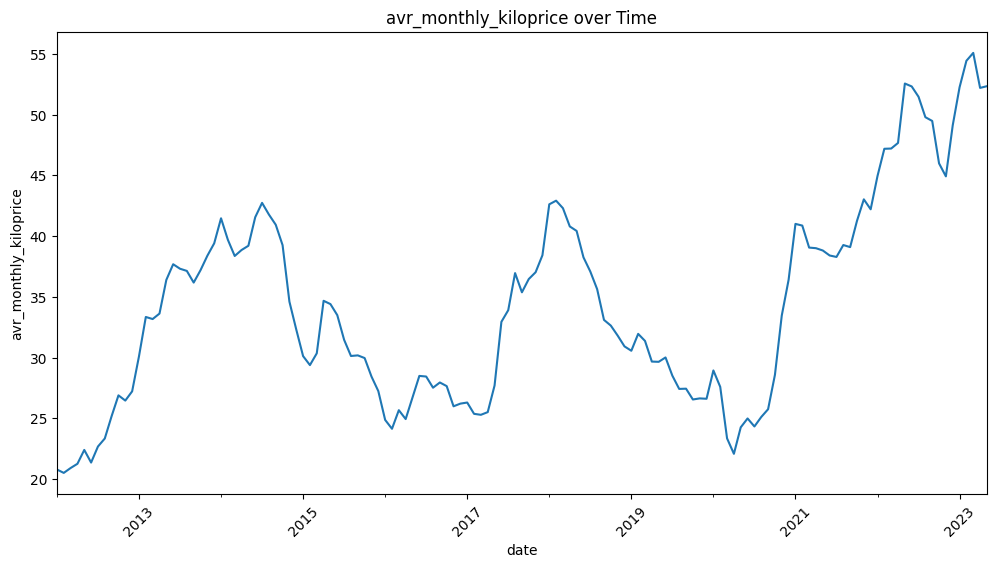

In [52]:
df['avr_monthly_kiloprice'].plot(title="avr_monthly_kiloprice over Time", figsize=(12,6))
plt.xlabel("date")
plt.ylabel("avr_monthly_kiloprice")
plt.xticks(rotation=45)
plt.show()



*   The chart shows an upward trend over the years, showing that the average monthly price has more than doubled over 11 years.
*   There is a sustained long-term price growth, suggesting inflationary pressure or increasing commodity price over time.
*   There is dip around 2015 and 2020, followed by a strong increase afterwards, this indicates possible, Economic disruption in chain supply for those periods.
* The strongest consistent upward trend is between 2021 to 2023.






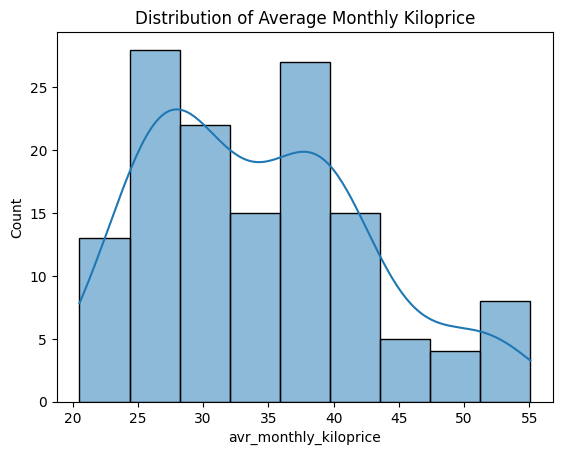

In [53]:
#Check distribution using histogram
sns.histplot(df['avr_monthly_kiloprice'], kde=True)
plt.title("Distribution of Average Monthly Kiloprice")
plt.show()




*   The distribution is slightly right-skewed (positively skewed) as most values are clustered around 25 and 40.



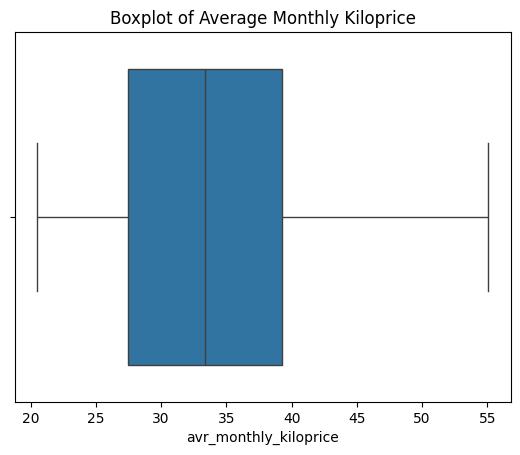

In [54]:
#check for outliers

sns.boxplot(x=df['avr_monthly_kiloprice'])
plt.title("Boxplot of Average Monthly Kiloprice")
plt.show()


No outliers

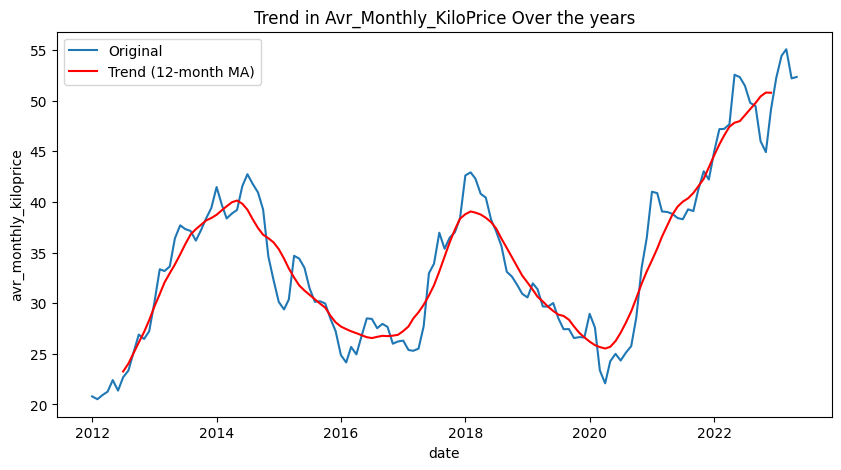

In [55]:
#Check for Trends
df['Trend'] = df['avr_monthly_kiloprice'].rolling(window=12, center=True).mean()

plt.figure(figsize=(10,5))
plt.plot(df['avr_monthly_kiloprice'], label='Original')
plt.plot(df['Trend'], label='Trend (12-month MA)', color='red')
plt.title("Trend in Avr_Monthly_KiloPrice Over the years")
plt.xlabel("date")
plt.ylabel("avr_monthly_kiloprice")
plt.legend()
plt.show()

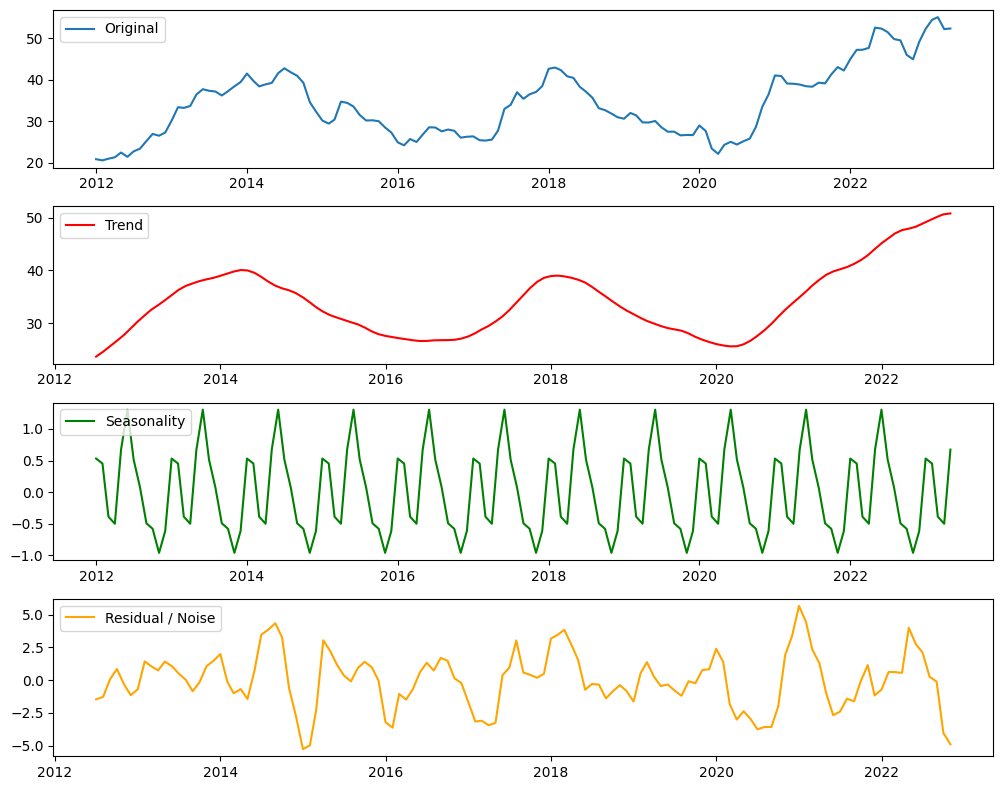

In [58]:
decomposition = seasonal_decompose(df['avr_monthly_kiloprice'], model='additive', period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.figure(figsize=(10,8))

plt.subplot(4,1,1)
plt.plot(df['avr_monthly_kiloprice'], label='Original')
plt.legend(loc='upper left')

plt.subplot(4,1,2)
plt.plot(trend, label='Trend', color='red')
plt.legend(loc='upper left')

plt.subplot(4,1,3)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')

plt.subplot(4,1,4)
plt.plot(residual, label='Residual / Noise', color='orange')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

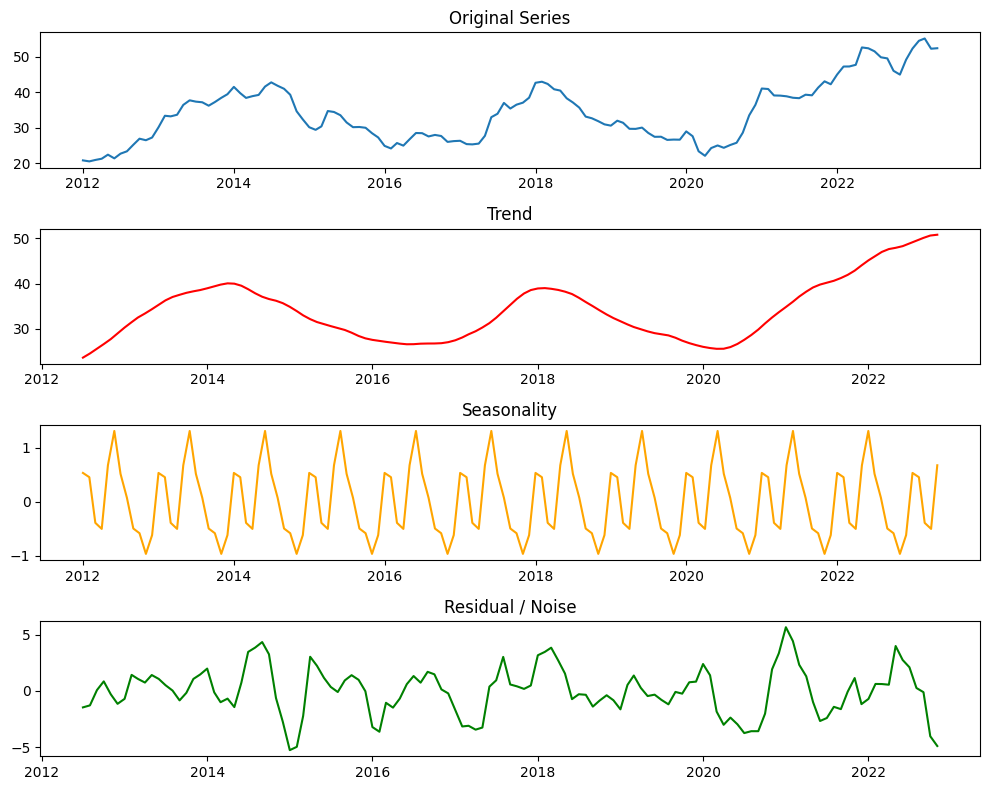

In [62]:
# Ensure monthly frequency (important for proper decomposition)
df = df.asfreq('MS')   # MS = Month Start

# Additive decomposition
decomposition = seasonal_decompose(
    df['avr_monthly_kiloprice'],
    model='additive',
    period=12
)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.figure(figsize=(10,8))

plt.subplot(4,1,1)
plt.plot(df['avr_monthly_kiloprice'])
plt.title('Original Series')

plt.subplot(4,1,2)
plt.plot(trend, color='red')
plt.title('Trend')

plt.subplot(4,1,3)
plt.plot(seasonal, color='orange')
plt.title('Seasonality')

plt.subplot(4,1,4)
plt.plot(residual, color='green')
plt.title('Residual / Noise')

plt.tight_layout()
plt.show()

Check Stationarity (this is important for Forecasting)

In [63]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['avr_monthly_kiloprice'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] < 0.05:
  print("The series is likely stationary")
else:
  print("The series is likely non_stationary")

ADF Statistic: -1.6879689803233129
p-value: 0.4373216371351407
The series is likely non_stationary


In [64]:
print(result)

(np.float64(-1.6879689803233129), np.float64(0.4373216371351407), 1, 135, {'1%': np.float64(-3.479742586699182), '5%': np.float64(-2.88319822181578), '10%': np.float64(-2.578319684499314)}, np.float64(482.9690778425961))


**Make Data Stationary**

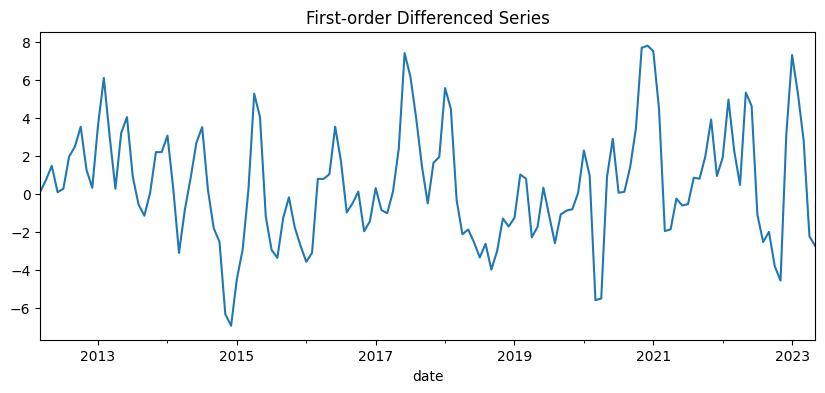

In [65]:
df['Diff_1'] = df['avr_monthly_kiloprice'] - df['avr_monthly_kiloprice'].shift(2)

#Drop missing values
df_diff = df['Diff_1'].dropna()

df_diff.plot(title="First-order Differenced Series", figsize=(10,4))
plt.show()

In [66]:
result_diff = adfuller(df_diff)

print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])
if result_diff[1] < 0.05:
    print("The series is likely stationary")
else:
    print("The series is likely non-stationary")

ADF Statistic: -3.863816803486728
p-value: 0.002317875265375661
The series is likely stationary


Using ARIMA times series method to Forecast

In [67]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['avr_monthly_kiloprice'], order=(1,1,1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=12)
print(forecast)

2023-06-01    52.606967
2023-07-01    52.672424
2023-08-01    52.688474
2023-09-01    52.692409
2023-10-01    52.693374
2023-11-01    52.693610
2023-12-01    52.693668
2024-01-01    52.693682
2024-02-01    52.693686
2024-03-01    52.693687
2024-04-01    52.693687
2024-05-01    52.693687
Freq: MS, Name: predicted_mean, dtype: float64


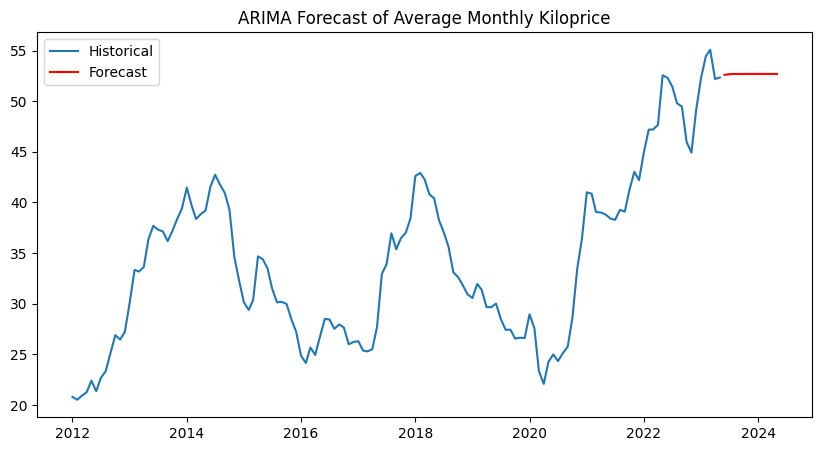

In [69]:
#Plot Forecast

plt.figure(figsize=(10,5))
plt.plot(df['avr_monthly_kiloprice'], label='Historical')
plt.plot(forecast, label='Forecast', color='red')
plt.title("ARIMA Forecast of Average Monthly Kiloprice")
plt.legend()
plt.show()

Arima seem to have fialed due to is short Memory.
will try another method and compare